In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

### Load Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/arvin0711/kuliah-data-lakehouse/main/heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

### Preprocesing Data

Memberi label encoding data kategorikal

In [4]:

for col in df[['Sex','Blood Pressure','Diet','Country','Continent','Hemisphere']]:
  df[col] = LabelEncoder().fit_transform(df[col])



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   int64  
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   int64  
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
# Keep a certain number of samples
num_samples_to_keep = 1000 # 100 - 1000 (pilih rentang 100 - 1000)
df = df[:num_samples_to_keep]

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
df_c = df.drop(['Patient ID'], axis=1)

In [9]:
df_c.isnull().sum()

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

### Clasification

In [10]:
X = df_c.iloc[:, 1:-1].values
y = df_c.iloc[:, -1].values

Membagi data menjadi data training dan testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [12]:
# Display results
lengths = {
    'X_train': len(X_train),
    'y_train': len(y_train),
    'X_test': len(X_test),
    'y_test': len(y_test)
}

# Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)


         Length
X_train     700
y_train     700
X_test      300
y_test      300


#### Klasifikasi metode Logistic Regression

In [13]:
X = df_c.iloc[:, 1:-1].values
y = df_c.iloc[:, -1].values

In [14]:
classifier = sklearn.linear_model.LogisticRegression(C=1, random_state = 42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.7033333333333334


In [15]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv =10)
accuracies.mean()

0.6471428571428571

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83       211
           1       0.00      0.00      0.00        89

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300



#### Klasifikasi metode Naive Bayes

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
classifier=GaussianNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

0.685


In [19]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv =10)
accuracies.mean()

0.66125

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81       137
           1       0.00      0.00      0.00        63

    accuracy                           0.69       200
   macro avg       0.34      0.50      0.41       200
weighted avg       0.47      0.69      0.56       200



# Clustering

In [21]:
from sklearn.cluster import KMeans
import yellowbrick
from yellowbrick.style import set_palette
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN

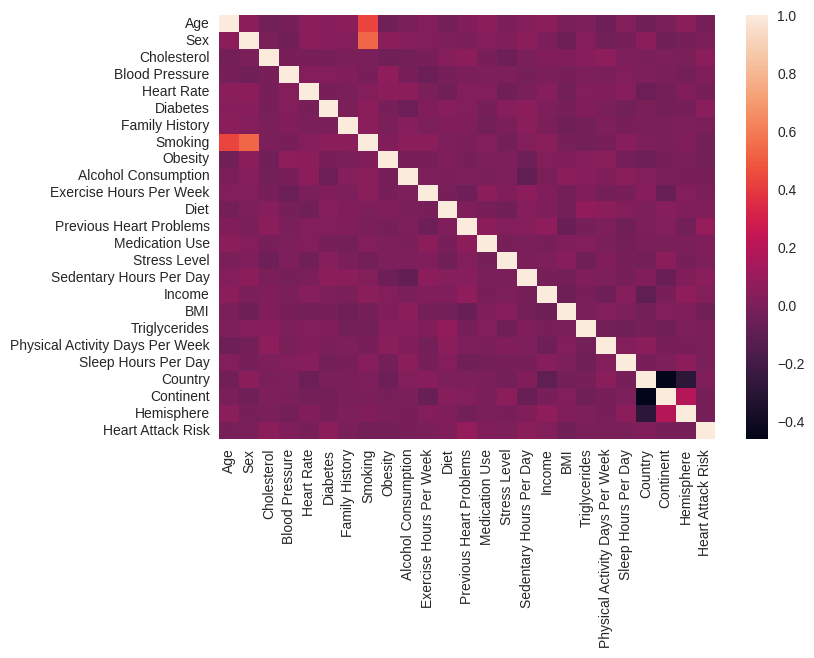

In [22]:

# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

dataplot=sb.heatmap(df_c.corr())

# displaying heatmap
mp.show()

In [23]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1000 non-null   int64  
 1   Sex                              1000 non-null   int64  
 2   Cholesterol                      1000 non-null   int64  
 3   Blood Pressure                   1000 non-null   int64  
 4   Heart Rate                       1000 non-null   int64  
 5   Diabetes                         1000 non-null   int64  
 6   Family History                   1000 non-null   int64  
 7   Smoking                          1000 non-null   int64  
 8   Obesity                          1000 non-null   int64  
 9   Alcohol Consumption              1000 non-null   int64  
 10  Exercise Hours Per Week          1000 non-null   float64
 11  Diet                             1000 non-null   int64  
 12  Previous Heart Proble

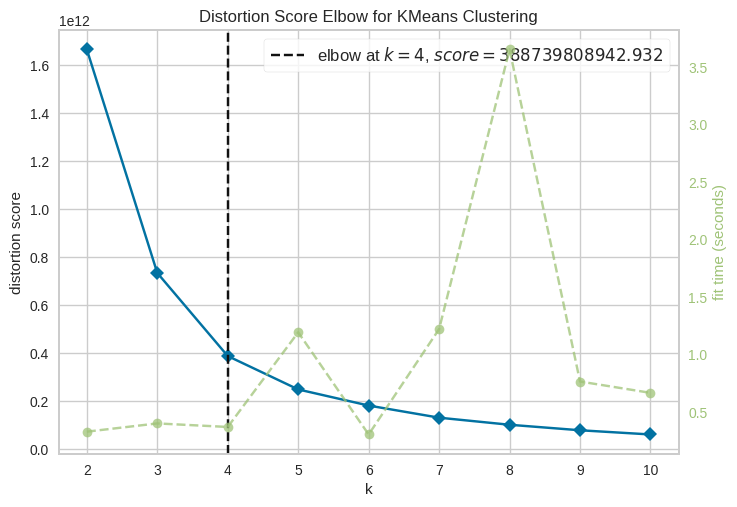

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
model = yellowbrick.cluster.KElbowVisualizer(KMeans()) # def k = 10

model.fit(df_c)
model.show()

<Axes: xlabel='Cholesterol', ylabel='Income'>

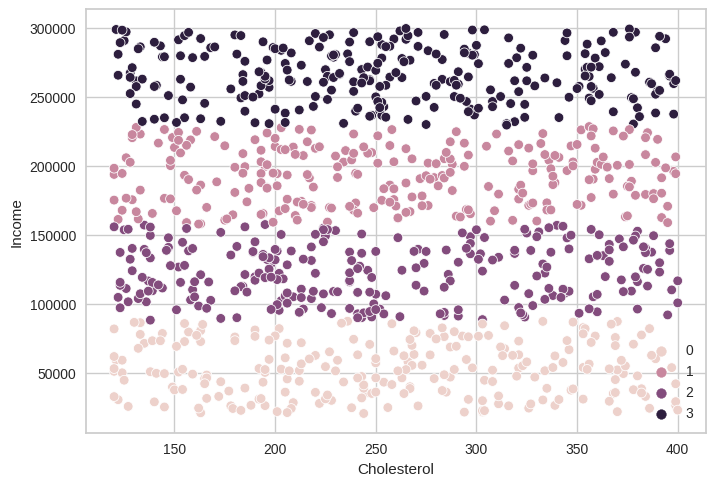

In [25]:
clustering = sklearn.cluster.KMeans(n_clusters = 4)
clustering.fit(df_c)

sns.scatterplot(data = df_c, x = 'Cholesterol', y ='Income' , hue = clustering.labels_)

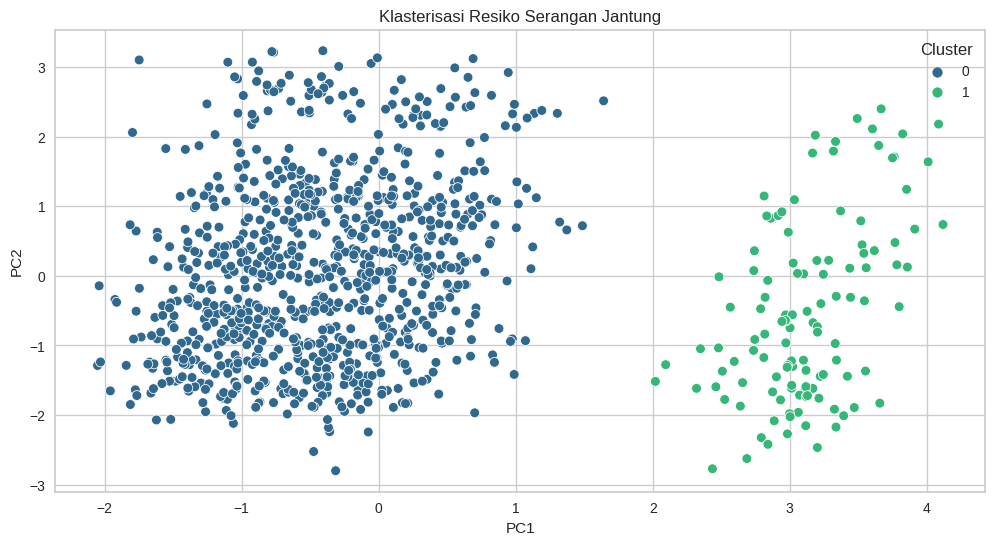

In [26]:
from sklearn.decomposition import PCA

# Baca dataset
# Gantilah 'nama_file.csv' dengan nama file dataset Anda


# Hapus kolom 'Heart Attack Risk' karena kita akan melakukan clustering
X = df_c.drop('Heart Attack Risk', axis=1)

# Standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pilih jumlah kluster yang diinginkan (misalnya, 2 kluster)
n_clusters = 2
# Inisialisasi dan latih model KMeans
kmeans = KMeans(n_clusters=n_clusters , random_state=42)
df_c['Cluster'] = kmeans.fit_predict(X_scaled)

# Reduksi dimensi menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_c[['PC1', 'PC2']] = X_pca

# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_c, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50)
plt.title('Klasterisasi Resiko Serangan Jantung')
plt.show()

In [27]:
df2 = pd.read_csv('https://raw.githubusercontent.com/arvin0711/kuliah-data-lakehouse/main/healthcare_dataset.csv')
df2.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [29]:
for col in df2[['Name','Gender','Blood Type','Medical Condition','Doctor','Test Results','Hospital','Insurance Provider','Admission Type','Discharge Date','Medication','Date of Admission']]:
  df2[col] = LabelEncoder().fit_transform(df2[col])


### mencari nilai n yang optimal

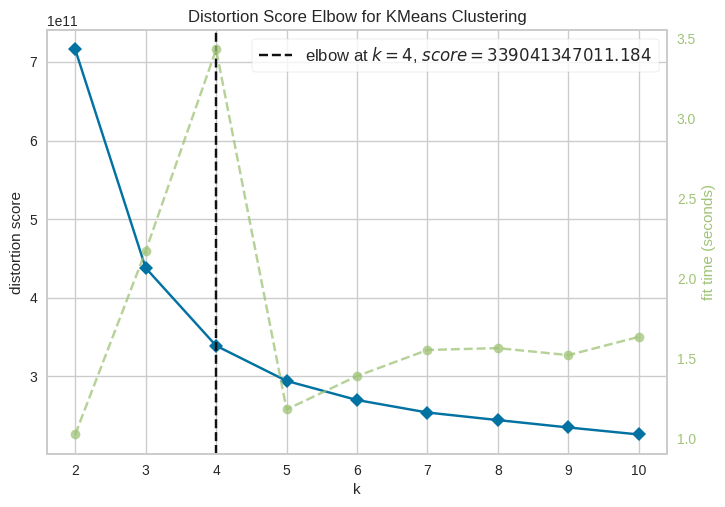

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
model = yellowbrick.cluster.KElbowVisualizer(KMeans()) # def k = 10

model.fit(df2)
model.show()

<Axes: xlabel='Age', ylabel='Billing Amount'>

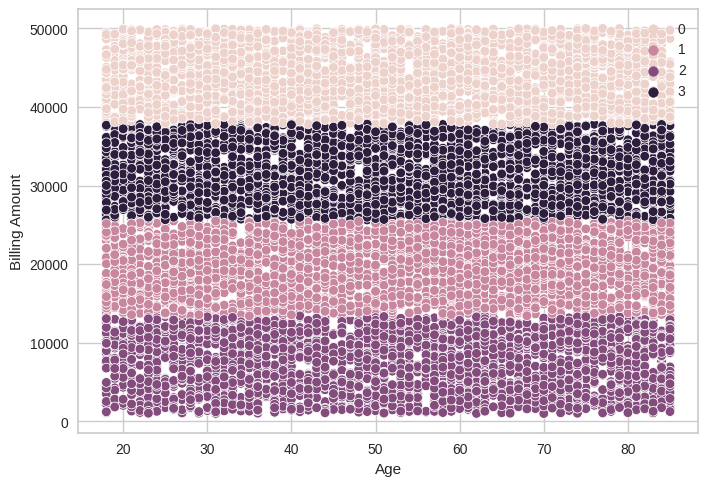

In [31]:
clustering = sklearn.cluster.KMeans(n_clusters = 4)
clustering.fit(df2)

sns.scatterplot(data = df2, x = 'Age', y ='Billing Amount' , hue = clustering.labels_)

# Association Rule

### Load Dataset

In [32]:
df3 = pd.read_csv('https://raw.githubusercontent.com/arvin0711/kuliah-data-lakehouse/main/Online_Retail.csv')
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [34]:
### Konvert kolom  'InvoiceDate' menjadi kolom tipe datetime
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [36]:
#buat tabel pivot dari dataframe df3 dengan nilai kolom selled sebagai nilai, nomor faktur (InvoiceNo) sebagai baris, dan deskripsi produk (Description) sebagai kolom.

In [37]:
df3['selled'] = 1
pivot = df3.pivot_table(values='selled',index='InvoiceNo',columns='Description').fillna(0)
print('Pivot Table Shape :',pivot.shape)
print(pivot.info())
pivot.head()

Pivot Table Shape : (24446, 4223)
<class 'pandas.core.frame.DataFrame'>
Index: 24446 entries, 536365 to C581569
Columns: 4223 entries,  4 PURPLE FLOCK DINNER CANDLES to wrongly sold sets
dtypes: float64(4223)
memory usage: 787.8+ MB
None


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#memotong tabel pivot pivot menjadi 4104 kolom pertama

In [39]:
pivot = pivot.iloc[:,:4104]
pivot.shape
pivot.shape

(24446, 4104)

### Gunakan Algoritma Apriori

 Algroritma apriori digunakan untuk menemukan frekuensi itemsets yg kemudian disimpan di variabel freq_items  

In [40]:
from mlxtend.frequent_patterns import association_rules, apriori, fpgrowth
freq_items = apriori(pivot,min_support=0.02,use_colnames=True).sort_values(by='support',ascending=False)
freq_items

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
189,0.094167,(WHITE HANGING HEART T-LIGHT HOLDER)
147,0.088726,(REGENCY CAKESTAND 3 TIER)
73,0.087335,(JUMBO BAG RED RETROSPOT)
119,0.069786,(PARTY BUNTING)
94,0.065737,(LUNCH BAG RED RETROSPOT)
...,...,...
236,0.020044,"(RED RETROSPOT CHARLOTTE BAG, STRAWBERRY CHARL..."
226,0.020044,"(LUNCH BAG APPLE DESIGN, LUNCH BAG RED RETROSPOT)"
168,0.020003,(SET/3 RED GINGHAM ROSE STORAGE BOX)
114,0.020003,(PANTRY MAGNETIC SHOPPING LIST)


itemset frekuensi (WHITE HANGING HEART T-LIGHT HOLDER) memiliki nilai dukungan 0,094167. Ini berarti bahwa itemset ini muncul dalam 9,4167% transaksi dalam kumpulan data.









*  **Support atau nilai dukungan** adalah probabilitas pelanggan membeli beberapa produk secara bersamaan dari seluruh transaksi.
*    Confidence atau tingkat kepercayaan merupakan probabilitas kejadian beberapa produk dibeli secara bersamaan, dimana salah satu produk sudah pasti dibeli.


*  **Minimum Support** merupakan parameter yang digunakan sebagai batasan frekuensi kejadian atau support count yang harus dipenuhi oleh suatu kelompok data untuk dijadikan aturan.
*   **Minimum Confidence** adalah parameter yang mendefinisikan minimum level dari confidence yang harus dipenuhi oleh aturan yang berkualitas.
Itemset yaitu kelompok produk.

*  **Support Count** adalah frekuensi kejadian untuk sebuah kelompok produk atau itemset dari seluruh transaksi.
*   Minimum threshold adalah nilai batas ambang yang harus diperoleh untuk mendapatkan perwakilan produk-produk yang dibeli bersamaan.

*   **Lift rasio** adalah jenis pengujian yang digunakan untuk melihat kuat tidaknya aturan asosiasi dalam data mining khususnya pada Algoritma A Priori. Lift sendiri sebenarnya adalah sebuah angka ratio yang menunjukkan berapa banyak kemungkinan menemukan sebuah atribut yang muncul bersamaan dengan atribut lainnya dibandingkan dengan seluruh kejadian adanya atribut yang terpenuhi. Nilai lift ratio lebih besar dari 1 menunjukkan adanya manfaat dari aturan tersebut. Lebih tinggi nilai lift ratio, lebih besar kekuatan asosiasi.


*   **Leverage** adalah nilai yang mengukur banyaknya item antecedent dan consequence yang dijual secara bersamaan dalam suatu data set yang lebih dari yang diharapkan. Nilai 0 menunjukkan antecedent dan consequent independent.




*   **Conviction** adalah perhitungan untuk menentukan nilai akurasi minimum pada metode association rules.Nilai range pada conviction ini berada pada 0.5 sampai 1 sampai ∞ atau tak hingga. Dengan ketentuan conviction dianggap memiliki nilai tak hingga (infinite) apabila nilai dari confidence (A→B) sama dengan 1. Jika conviction menghasilkan nilai rules yang semakin menjauh dari 1 bahkan sampai tak hingga, maka akan di anggap
semakin akurat.










































*   **Frequent itemsets** adalah itemsets yang muncul setidaknya dalam min_support proporsi transaksi. Dalam contoh ini, min_support disetel ke 0.02, yang berarti bahwa frequent itemsets adalah itemsets yang muncul setidaknya dalam 2% transaksi.
*   **Fungsi Association rule** digunakan menunjukkan hubungan antara dua atau lebih item. Aturan asosiasi dapat digunakan untuk menemukan pola dalam perilaku pembelian pelanggan, pola penjualan produk, dan pola lainnya.


*   **Lift** adalah metrik yang mengukur seberapa kuat hubungan antara dua atau lebih item. Lift 1 berarti bahwa itemset konsekuen muncul dalam proporsi transaksi yang sama dengan itemset anteseden. Lift lebih besar dari 1 berarti bahwa itemset konsekuen muncul dalam proporsi transaksi yang lebih tinggi daripada yang diharapkan, sedangkan lift kurang dari 1 berarti bahwa itemset konsekuen muncul dalam proporsi transaksi yang lebih rendah daripada yang diharapkan.
*  




### Melihat Hubungan Produk yang dibeli dengan fungsi association rule

In [41]:
rules = association_rules(freq_items,metric='lift',min_threshold=1).sort_values(by='lift',ascending=False)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
36,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.032071,0.032766,0.022458,0.700255,21.371331,0.021407,3.226857,0.984791
37,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.032766,0.032071,0.022458,0.685393,21.371331,0.021407,3.076632,0.985499
38,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.043238,0.025117,0.022458,0.519395,20.679346,0.021372,2.028448,0.994649
35,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.025117,0.043238,0.022458,0.894137,20.679346,0.021372,9.037720,0.976160
32,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.031293,0.037798,0.022458,0.717647,18.986580,0.021275,3.407800,0.977934


### Intreptasi Hasil
Association rule ini menunjukkan bahwa jika pelanggan membeli item antcedents, maka mereka juga cenderung membeli item consequents. Sebagai contoh jika pelanggan membeli (PINK REGENCY TEACUP AND SAUCER), maka mereka juga cenderung membeli (ROSES REGENCY TEACUP AND SAUCER, 'GREEN REGENCY TEACUP AND SAUCER). Lift dari association rule ini adalah 21.3713, yang berarti bahwa itemset konsekuen  muncul dalam proporsi transaksi yang 21.3713 kali lebih tinggi dari yang diharapkan.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
rules[(rules['lift']>1) & (rules['confidence']>0.5)]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
36,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.032071,0.032766,0.022458,0.700255,21.371331,0.021407,3.226857,0.984791
37,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.032766,0.032071,0.022458,0.685393,21.371331,0.021407,3.076632,0.985499
38,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.043238,0.025117,0.022458,0.519395,20.679346,0.021372,2.028448,0.994649
35,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.025117,0.043238,0.022458,0.894137,20.679346,0.021372,9.037720,0.976160
32,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.031293,0.037798,0.022458,0.717647,18.986580,0.021275,3.407800,0.977934
33,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.037798,0.031293,0.022458,0.594156,18.986580,0.021275,2.386893,0.984545
34,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.026344,0.045815,0.022458,0.852484,18.606996,0.021251,6.468368,0.971859
12,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.032766,0.043238,0.026344,0.803995,18.594571,0.024927,4.881314,0.978275
13,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.043238,0.032766,0.026344,0.609272,18.594571,0.024927,2.475463,0.988983
47,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.037143,0.035180,0.022008,0.592511,16.842470,0.020701,2.367721,0.976912
